In [1]:
# Import libaries and dependencies #
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import data & convert to dataframe
batting_data_load = "../Project_01/CHC_batting.csv"
batting_data = pd.read_csv(batting_data_load)
batting_data.head()

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,...,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
0,1,2023,C,Yan Gomes,35,116,419,382,44,102,...,0.723,93,156,9,9,0,7,1,Right,No
1,2,2023,1B,Trey Mancini,31,79,263,235,31,55,...,0.635,71,79,5,2,0,3,1,Right,No
2,3,2023,2B,Nico Hoerner,26,150,688,619,98,175,...,0.729,97,237,12,14,1,5,0,Right,No
3,4,2023,SS,Dansby Swanson,29,147,638,565,81,138,...,0.744,99,235,9,5,0,2,0,Right,No
4,5,2023,3B,Nick Madrigal,26,92,294,270,34,71,...,0.663,79,95,3,9,5,0,0,Right,No


In [3]:
# Import data & convert to dataframe
pitching_data_load = "../Project_01/CHC_pitching.csv"
pitching_data = pd.read_csv(pitching_data_load)
pitching_data.head()

,Rank,Year,Position,Name,Age,Wins,Losses,Winning_Percentage,Earned_Run_Average,Games_Played,...,Adjusted_Earned_Run_Average,Fielding_Independent_Pitching,Walks_Hits_Per_Inning_Pitched,Hits_Per_Nine_Innings,Home_Runs_Per_Nine_Innings,Walks_Per_Nine_Innings,Strikeouts_Per_Nine_Innings,Strikeout_Walk_Ratio,Dominant_Hand,Switch_Hitter
0,1,2023,SP,Justin Steele,27,16,5,0.762,3.06,30,...,146,3.02,1.171,8.7,0.7,1.9,9.1,4.89,Left,No
1,2,2023,SP,Jameson Taillon,31,8,10,0.444,4.84,30,...,93,4.61,1.276,9.1,1.6,2.4,8.2,3.41,Right,No
2,3,2023,SP,Drew Smyly,34,11,11,0.500,5.00,41,...,90,4.96,1.426,9.3,1.6,3.5,8.9,2.52,Left,No
3,4,2023,SP,Kyle Hendricks,33,6,8,0.429,3.74,24,...,120,3.81,1.204,9.1,0.9,1.8,6.1,3.44,Right,No
4,5,2023,SP,Marcus Stroman,32,10,9,0.526,3.95,27,...,113,3.58,1.259,7.9,0.6,3.4,7.8,2.29,Right,No


In [4]:
# Explore data

print("General info about batting:")
print(batting_data.shape)
print(batting_data.columns)
print(batting_data.dtypes)

print("General info about pitching:")
print(pitching_data.shape)
print(pitching_data.columns)
pitching_data.dtypes

General info about batting:
(5241, 31)
Index(['Rank', 'Year', 'Position', 'Name', 'Age', 'Games', 'Plate_Appearances',
       'At_Bats', 'Runs', 'Hits', 'Doubles', 'Triples', 'Home_Runs',
       'Runs_Batted_In', 'Stolen_Bases', 'Caught_Stealing', 'Base_On_Balls',
       'Strikeouts', 'Batting_Average', 'On_Base_Percentage',
       'Slugging_Percentage', 'On_Base_Plus_Slugging_Percentage',
       'On_Base_Plus_Slugging_Percentage_Plus', 'Total_Bases',
       'Double_Plays_Grounded_Into', 'Times_Hit_By_Pitch', 'Sacrifice_Hits',
       'Sacrifice_Flies', 'Intentional_Bases_on_Balls', 'Dominant_Hand',
       'Switch_Hitter'],
      dtype='object')
Rank                                       int64
Year                                       int64
Position                                  object
Name                                      object
Age                                        int64
Games                                      int64
Plate_Appearances                          int64
At_B

Rank                               int64
Year                               int64
Position                          object
Name                              object
Age                                int64
Wins                               int64
Losses                             int64
Winning_Percentage               float64
Earned_Run_Average               float64
Games_Played                       int64
Games_Started                      int64
Games_Finished                     int64
Complete_Games                     int64
Shutouts                           int64
Saves                              int64
Innings_Pitched                  float64
Hits_Allowed                       int64
Runs_Allowed                       int64
Earned_Runs                        int64
Home_Runs_Allowed                  int64
Walks_Allowed                      int64
Intentional_Walks_Allowed          int64
Strikeouts                         int64
Hit_By_Pitch                       int64
Balks           

In [5]:
# # Convert object to string
# batting_data['Position'] = batting_data['Position'].astype("string")
# print(batting_data['Position'].dtype)

In [6]:
# # Convert object to string
# pitching_data['Dominant_Hand'] = pitching_data['Dominant_Hand'].astype("string")
# print(pitching_data['Dominant_Hand'].dtype)

In [7]:
# Check for missing values
print(batting_data.isna().sum())             
print(pitching_data.isna().sum())

Rank                                      0
Year                                      0
Position                                 78
Name                                      0
Age                                       0
Games                                     0
Plate_Appearances                         0
At_Bats                                   0
Runs                                      0
Hits                                      0
Doubles                                   0
Triples                                   0
Home_Runs                                 0
Runs_Batted_In                            0
Stolen_Bases                              0
Caught_Stealing                           0
Base_On_Balls                             0
Strikeouts                                0
Batting_Average                           0
On_Base_Percentage                        0
Slugging_Percentage                       0
On_Base_Plus_Slugging_Percentage          0
On_Base_Plus_Slugging_Percentage

In [8]:
# There are nans in the Position column. List the batting positions.
batting_data["Position"].unique()

array(['C', '1B', '2B', 'SS', '3B', 'LF', 'CF', 'RF', 'DH', 'CI', 'OF',
       'P', 'UT', 'IF', 'MI', nan], dtype=object)

In [9]:
# Drop the rows with missing Position.
batting_position_clean = batting_data.dropna()
batting_position_clean

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,...,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
0,1,2023,C,Yan Gomes,35,116,419,382,44,102,...,0.723,93,156,9,9,0,7,1,Right,No
1,2,2023,1B,Trey Mancini,31,79,263,235,31,55,...,0.635,71,79,5,2,0,3,1,Right,No
2,3,2023,2B,Nico Hoerner,26,150,688,619,98,175,...,0.729,97,237,12,14,1,5,0,Right,No
3,4,2023,SS,Dansby Swanson,29,147,638,565,81,138,...,0.744,99,235,9,5,0,2,0,Right,No
4,5,2023,3B,Nick Madrigal,26,92,294,270,34,71,...,0.663,79,95,3,9,5,0,0,Right,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236,7,1876,OF,John Glenn,26,66,288,276,55,84,...,0.685,120,97,0,0,0,0,0,Right,No
5237,8,1876,OF,Paul Hines,21,64,306,305,62,101,...,0.773,146,134,0,0,0,0,0,Right,No
5238,9,1876,OF,Oscar Bielaski,29,32,141,139,24,29,...,0.450,44,32,0,0,0,0,0,Right,No
5239,10,1876,OF,Fred Andrus,25,8,36,36,6,11,...,0.694,121,14,0,0,0,0,0,Right,No


In [10]:
# Confirm the rows with missing Position were dropped.
print(len(batting_data))
print(len(batting_position_clean))
print(len(batting_data) - len(batting_position_clean))
print(batting_position_clean.isna().sum())
batting_position_clean["Position"].unique() 

5241
5163
78
Rank                                     0
Year                                     0
Position                                 0
Name                                     0
Age                                      0
Games                                    0
Plate_Appearances                        0
At_Bats                                  0
Runs                                     0
Hits                                     0
Doubles                                  0
Triples                                  0
Home_Runs                                0
Runs_Batted_In                           0
Stolen_Bases                             0
Caught_Stealing                          0
Base_On_Balls                            0
Strikeouts                               0
Batting_Average                          0
On_Base_Percentage                       0
Slugging_Percentage                      0
On_Base_Plus_Slugging_Percentage         0
On_Base_Plus_Slugging_Percentage_Plus    

array(['C', '1B', '2B', 'SS', '3B', 'LF', 'CF', 'RF', 'DH', 'CI', 'OF',
       'P', 'UT', 'IF', 'MI'], dtype=object)

In [11]:
# duplicates: Since the players are listed by rank, each player should only appear once per year. 
# Confirm that there are no duplicates.
duplicate_players = batting_data.loc[batting_data.duplicated(['Name','Year']), "Name"].unique()
print(duplicate_players)

[]


In [12]:
# Confirm there are no outliers to skew our data results?

In [13]:
# Initial data exploration:
# sum stats

# visualizations for potential relationships (-> regression)

The r-value is 0.0056428420095168364.


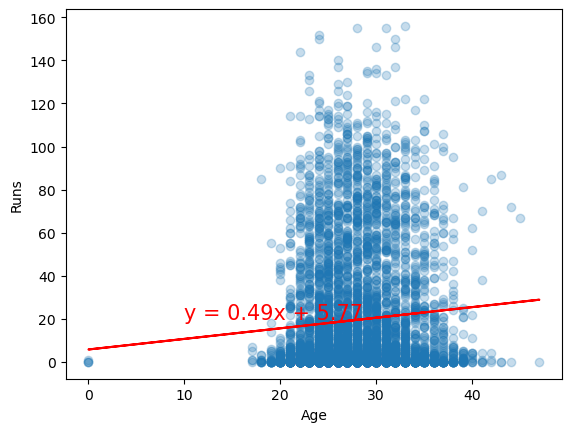

The r-value is 0.008256072644018128.


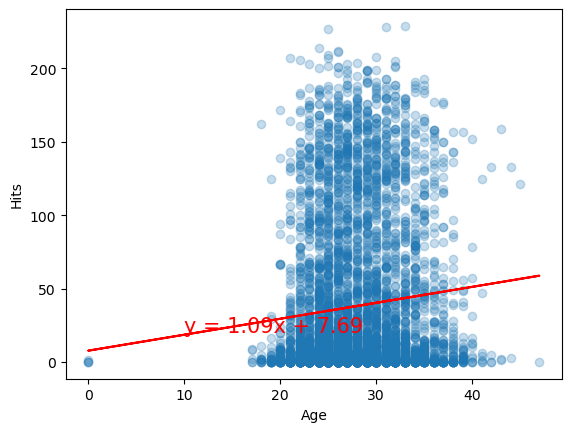

The r-value is 0.009900761218802703.


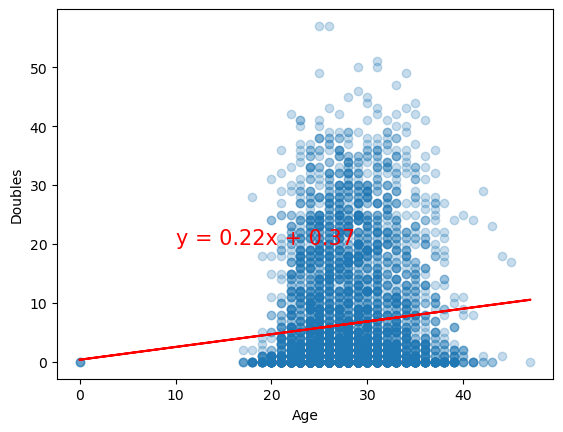

The r-value is 3.507418844650481e-05.


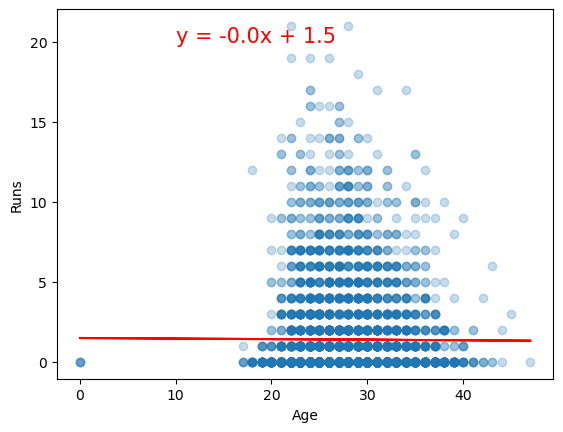

The r-value is 0.010362006106735587.


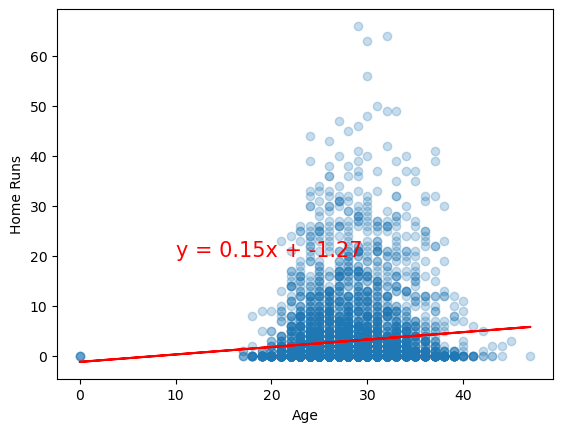

Age does not predict performance.


In [14]:
# Visualizations for Age & Performance
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], batting_data["Runs"])
regress_values = batting_data["Age"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue**2}.")
plt.scatter(batting_data["Age"],batting_data["Runs"], alpha=0.25)
plt.plot(batting_data["Age"],regress_values,"r-")
plt.xlabel("Age")
plt.ylabel("Runs")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.show()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], batting_data["Hits"])
regress_values = batting_data["Age"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue**2}.")
plt.scatter(batting_data["Age"],batting_data["Hits"], alpha=0.25)
plt.plot(batting_data["Age"],regress_values,"r-")
plt.xlabel("Age")
plt.ylabel("Hits")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.show()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], batting_data["Doubles"])
regress_values = batting_data["Age"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue**2}.")
plt.scatter(batting_data["Age"],batting_data["Doubles"], alpha=0.25)
plt.plot(batting_data["Age"],regress_values,"r-")
plt.xlabel("Age")
plt.ylabel("Doubles")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.show()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], batting_data["Triples"])
regress_values = batting_data["Age"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue**2}.")
plt.scatter(batting_data["Age"],batting_data["Triples"], alpha=0.25)
plt.plot(batting_data["Age"],regress_values,"r-")
plt.xlabel("Age")
plt.ylabel("Runs")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.show()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], batting_data["Home_Runs"])
regress_values = batting_data["Age"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue**2}.")
plt.scatter(batting_data["Age"],batting_data["Home_Runs"], alpha=0.25)
plt.plot(batting_data["Age"],regress_values,"r-")
plt.xlabel("Age")
plt.ylabel("Home Runs")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.show()

print("Age does not predict performance.")

## Research Question #3:
### Does player position have an impact on batter performance? 

We will compare the player’s position to their runs batted, bases stolen, and home runs.

#### Preliminary visualizations to assess player position and batter performance:

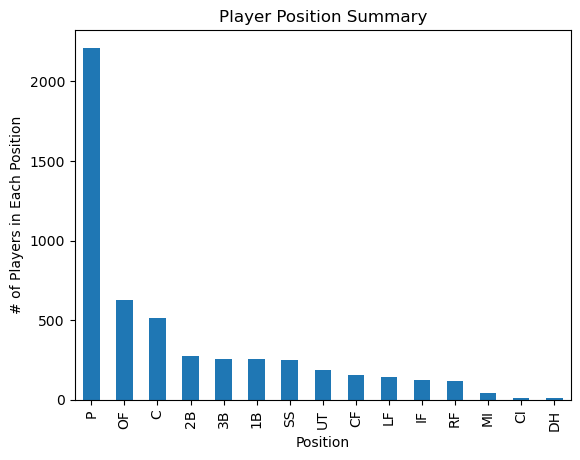

First, we observe that there are many more players in the Pitcher position than all other positions,
      so there is potential for this to skew the comparisons. 
      For example, because there are so many pitchers, 
      will we be able to glean accurate insight on how player position impacts the number of home runs, 
      if the pitcher position always has the most home runs simply due to the number of players?


In [15]:
# Player Position Summary: The number of players in each position
position_total = batting_data["Position"].value_counts()
position_total.plot(kind='bar',
                    xlabel='Position',
                    ylabel='# of Players in Each Position',
                    title="Player Position Summary")
plt.savefig("Figures/Player_Position_Summary.png")
plt.show()

print("""First, we observe that there are many more players in the Pitcher position than all other positions,
      so there is potential for this to skew the comparisons. 
      For example, because there are so many pitchers, 
      will we be able to glean accurate insight on how player position impacts the number of home runs, 
      if the pitcher position always has the most home runs simply due to the number of players?""")

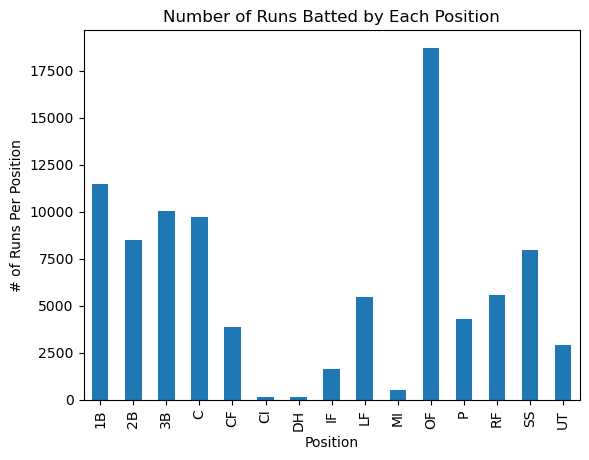

This eases our concern about the pitchers automatically having the 
      largest number of runs batted, but we observe that the next most common positions,
      outfielders, catchers, and first, second, and third basemen,
      also have the largest number of runs batted.
      
      
      
      


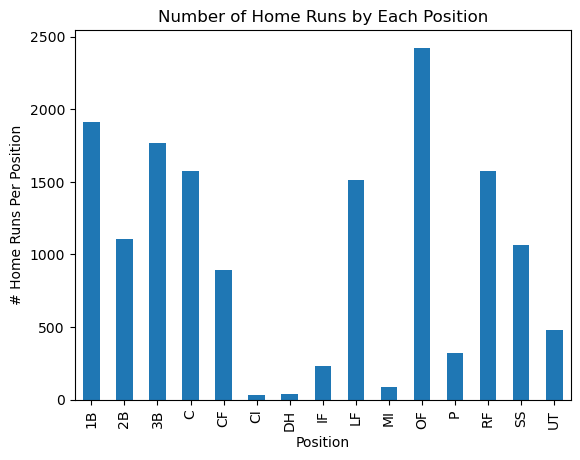

We notice a similar concern as the number of runs batted.  
      However, left- and right-fielders, positions that have a relatively
      small number of players,  score a competitive number of home runs.
      
      
      
      


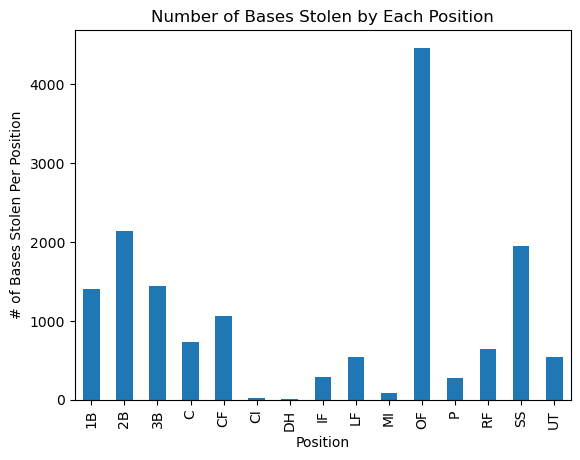

Outfielders, the second largest position category, perform well again. Shortstops
      perform comparatively well for the number of players.
      

      However, the positions that contain the fewest players
      (Corner Infield, Middle Infield, and Designated Hitter)
      consistenly have the lowest count for each measure of performance. 


      Further analysis is needed to determine a better measure of comparison.
      
      
      
      


In [16]:
# Number of Runs Batted by Each Position
position_runs_total = batting_data.groupby(["Position"])["Runs_Batted_In"].sum()
position_runs_total.head()
position_runs_total.plot(kind='bar',
                    xlabel='Position',
                    ylabel='# of Runs Per Position',
                    title="Number of Runs Batted by Each Position")
plt.show()
print("""This eases our concern about the pitchers automatically having the 
      largest number of runs batted, but we observe that the next most common positions,
      outfielders, catchers, and first, second, and third basemen,
      also have the largest number of runs batted.
      
      
      
      """)


# Number of Home Runs by Each Position
position_homeruns_total = batting_data.groupby(["Position"])["Home_Runs"].sum()
position_homeruns_total.head()
position_homeruns_total.plot(kind='bar',
                    xlabel='Position',
                    ylabel='# Home Runs Per Position',
                    title="Number of Home Runs by Each Position")
plt.show()
print("""We notice a similar concern as the number of runs batted.  
      However, left- and right-fielders, positions that have a relatively
      small number of players,  score a competitive number of home runs.
      
      
      
      """)


# Number of Bases Stolen by Each Position
position_basesstolen_total = batting_data.groupby(["Position"])["Stolen_Bases"].sum()
position_basesstolen_total.head()
position_basesstolen_total.plot(kind='bar',
                    xlabel='Position',
                    ylabel='# of Bases Stolen Per Position',
                    title="Number of Bases Stolen by Each Position")
plt.show()
print("""Outfielders, the second largest position category, perform well again. Shortstops
      perform comparatively well for the number of players.
      

      However, the positions that contain the fewest players
      (Corner Infield, Middle Infield, and Designated Hitter)
      consistenly have the lowest count for each measure of performance. 


      Further analysis is needed to determine a better measure of comparison.
      
      
      
      """)

#### Further analysis to assess player position and batter performance:

To control for the number of players in each position, we will divide each performance measure by the number of players in each position.

In [17]:
### Set up for calculation:

# Confirm data structures
print(type(position_total))
print(type(position_runs_total))


# The position total index does not match the indices of the 
#   other Series in the comparison, so it will need to be changed.
print(position_total)
print(position_runs_total)


# For the series containing The number of players in each position,
#   sort the index so that it matches  
position_count = position_total.sort_index()
position_count


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
Position
P     2213
OF     626
C      515
2B     271
3B     257
1B     254
SS     246
UT     185
CF     153
LF     143
IF     125
RF     116
MI      40
CI      10
DH       9
Name: count, dtype: int64
Position
1B    11464
2B     8483
3B    10041
C      9710
CF     3842
CI      151
DH      128
IF     1639
LF     5460
MI      512
OF    18720
P      4289
RF     5588
SS     7975
UT     2919
Name: Runs_Batted_In, dtype: int64


Position
1B     254
2B     271
3B     257
C      515
CF     153
CI      10
DH       9
IF     125
LF     143
MI      40
OF     626
P     2213
RF     116
SS     246
UT     185
Name: count, dtype: int64

In [18]:
### Perform calculations:

# The number of ________ for that position / the number of players in that position 
#       = the average number of ________ per player in that position


# Average number of runs batted by each position:
runs_batted_avg_byposition = position_runs_total / position_count
print("Avg Runs batted:")
print(runs_batted_avg_byposition)

# Average number of homeruns by each position:
homeruns_avg_by_position = position_homeruns_total / position_count
print("Avg Homeruns:")
print(homeruns_avg_by_position)


# Average number of bases stolen by each position:
bases_stolen_avg_by_position = position_basesstolen_total / position_count
print("Avg Bases stolen:")
print(bases_stolen_avg_by_position)

Avg Runs batted:
Position
1B    45.133858
2B    31.302583
3B    39.070039
C     18.854369
CF    25.111111
CI    15.100000
DH    14.222222
IF    13.112000
LF    38.181818
MI    12.800000
OF    29.904153
P      1.938093
RF    48.172414
SS    32.418699
UT    15.778378
dtype: float64
Avg Homeruns:
Position
1B     7.519685
2B     4.081181
3B     6.879377
C      3.054369
CF     5.823529
CI     3.000000
DH     4.111111
IF     1.856000
LF    10.587413
MI     2.125000
OF     3.872204
P      0.146408
RF    13.568966
SS     4.333333
UT     2.594595
dtype: float64
Avg Bases stolen:
Position
1B    5.511811
2B    7.896679
3B    5.599222
C     1.407767
CF    6.960784
CI    1.900000
DH    0.666667
IF    2.248000
LF    3.783217
MI    2.175000
OF    7.137380
P     0.125621
RF    5.577586
SS    7.926829
UT    2.935135
dtype: float64


In [19]:
# Convert the individual series into a single dataframe
averages_data = pd.DataFrame({'Avg Runs Batted':runs_batted_avg_byposition,
                                'Avg Homeruns':homeruns_avg_by_position,
                                'Avg Bases Stolen':bases_stolen_avg_by_position})
averages_data

,Avg Runs Batted,Avg Homeruns,Avg Bases Stolen
Position,,,
1B,45.133858,7.519685,5.511811
2B,31.302583,4.081181,7.896679
3B,39.070039,6.879377,5.599222
C,18.854369,3.054369,1.407767
CF,25.111111,5.823529,6.960784
CI,15.100000,3.000000,1.900000
DH,14.222222,4.111111,0.666667
IF,13.112000,1.856000,2.248000
LF,38.181818,10.587413,3.783217


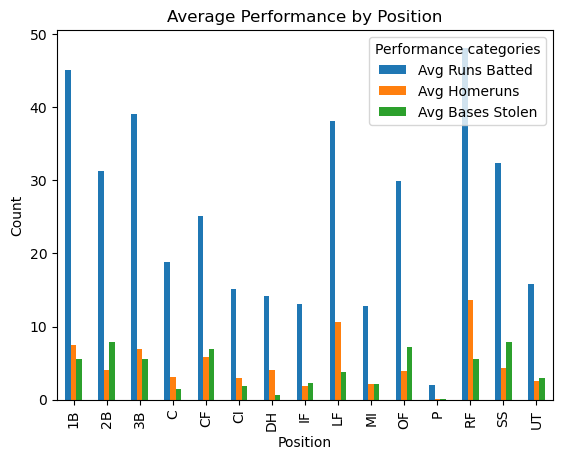

In [20]:
# Plot the averages data
averages_data_plot = averages_data.plot(kind='bar', stacked=False)          # need to figure out how to move legend
averages_data_plot.legend(loc='center', bbox_to_anchor=(1.0, 0.5))
plt.title('Average Performance by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.legend(title='Performance categories')
plt.show()

# players positition is lowest despite having the most number of players. 
# positions with lowest numer of players still have lowest average performance

In [21]:
# Add the Player position count to dataframe
# averages_data_andposition = averages_data
# averages_data_andposition["Position Count"] = position_count
# averages_data_andposition

In [22]:
# Plot the averages data with the position, too
# averages_data_andposition_plot = averages_data_andposition.plot(kind='barh', stacked=False)          # need to figure out how to move legend
# averages_data_andposition_plot.legend(loc='center', bbox_to_anchor=(1.0, 0.5))
# plt.title('Average Performance by Position')
# plt.xlabel('Position')
# plt.ylabel('Count')
# plt.legend(title='Performance categories')
# plt.show()

# How to better illustrate the difference? vertical vs horizontal (barh)
# illustrate the number of playres and performance in same vis

# Can I sort the positions index according to the index of the count series?

In [23]:
index_array = position_total.index
index_series = pd.Series(index_array, name='Position')
index_series



0      P
1     OF
2      C
3     2B
4     3B
5     1B
6     SS
7     UT
8     CF
9     LF
10    IF
11    RF
12    MI
13    CI
14    DH
Name: Position, dtype: object

In [24]:
averages_data_by_position_count = averages_data.reindex(index=index_series)
averages_data_by_position_count

,Avg Runs Batted,Avg Homeruns,Avg Bases Stolen
Position,,,
P,1.938093,0.146408,0.125621
OF,29.904153,3.872204,7.137380
C,18.854369,3.054369,1.407767
2B,31.302583,4.081181,7.896679
3B,39.070039,6.879377,5.599222
1B,45.133858,7.519685,5.511811
SS,32.418699,4.333333,7.926829
UT,15.778378,2.594595,2.935135
CF,25.111111,5.823529,6.960784


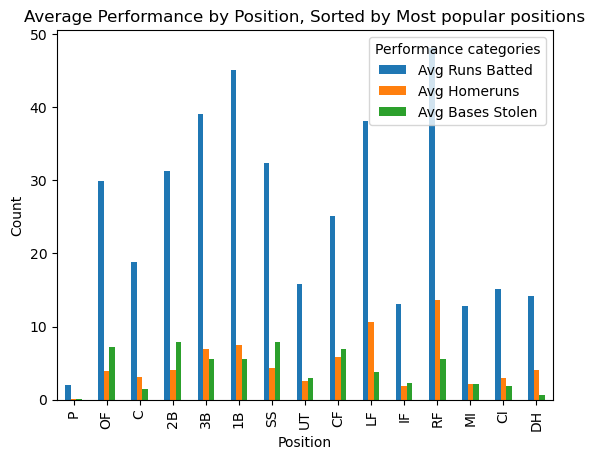

In [36]:
# Plot the averages data BUT with the player position count starting at left as in original figure
averages_data_by_position_count_plot = averages_data_by_position_count.plot(kind='bar', stacked=False)          # need to figure out how to move legend
averages_data_by_position_count_plot.legend(loc='center', bbox_to_anchor=(1.0, 0.5))
plt.title('Average Performance by Position, Sorted by Most popular positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.legend(title='Performance categories')
plt.savefig("Figures/Avg_Performance_Sorted.png")
plt.show()

In [25]:
## What do these results mean? do they make sense in the context of the game?


# vis?
# number of players in that position vs avg home runs for that position: scatter, regression?//
    # min, max

# boxplots on all 3 columns, in case of home runs outliers? then redo calcs?

#t-test?

# why are my variables not highlighting in blue?


### Can a player's home runs in a year be confounded by the number of Games or plate appearances?
# That is, players who appear at the plate less or play less games will automatically have less home runs
# Is this a selection issue? that the best players are the ones that appear in the most games?

In [48]:
# Look for outliers in all three performance categories (then drop from analysis?)
runs_batted_sumstat = batting_data["Runs_Batted_In"].describe()
homeruns_sumstat = batting_data["Home_Runs"].describe()
bases_stolen_sumstat = batting_data["Stolen_Bases"].describe()

q3_sumstat_data = pd.DataFrame({'Runs Batted':runs_batted_sumstat.map("{:,.0f}".format),
                                'Homeruns':homeruns_sumstat.map("{:,.0f}".format),
                                'Bases Stolen':bases_stolen_sumstat.map("{:,.0f}".format)})
q3_sumstat_data


,Runs Batted,Homeruns,Bases Stolen
count,"5,241","5,241","5,241"
mean,17,3,3
std,26,6,7
min,0,0,0
25%,0,0,0
50%,4,0,0
75%,25,2,2
max,191,66,84


<Axes: >

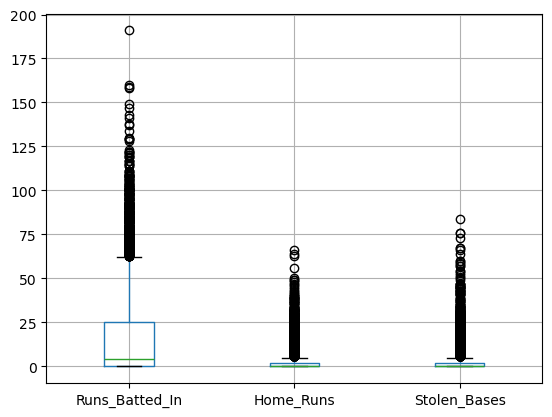

In [60]:
batting_data[["Runs_Batted_In", "Home_Runs", "Stolen_Bases"]].boxplot()
# runs batted is the most skewed, so focus there first
# but the 0's are less surpising since the runs batted also depends on where the other players are on their bases ?

# One possibilty: drop outliers on upper end
# OR only look at outliers on upper end to look at exceptional performance

In [61]:
# plt.boxplot(batting_data["Runs_Batted_In"])

In [62]:
# Remove the outliers for each performance category
# Home runs 

#IQR: 25 - 0 = 25. Upper whisker = Q3 + 1.5*IQR = 25 + 1.5*25 = 62.5

# defining outlier as being greater upper whisker 
runs_batted_outliers_removed = batting_data.loc[batting_data["Runs_Batted_In"] < 62.5]
runs_batted_outliers_removed

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,...,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
1,2,2023,1B,Trey Mancini,31,79,263,235,31,55,...,0.635,71,79,5,2,0,3,1,Right,No
4,5,2023,3B,Nick Madrigal,26,92,294,270,34,71,...,0.663,79,95,3,9,5,0,0,Right,No
9,10,2023,CF,Mike Tauchman,32,108,401,337,64,85,...,0.739,100,127,3,4,1,3,1,Left,No
10,11,2023,3B,Patrick Wisdom,31,97,302,268,43,55,...,0.789,107,134,4,2,1,1,0,Right,No
11,12,2023,CI,Jeimer Candelario,29,41,157,137,20,32,...,0.764,103,61,1,1,0,2,0,Right,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236,7,1876,OF,John Glenn,26,66,288,276,55,84,...,0.685,120,97,0,0,0,0,0,Right,No
5237,8,1876,OF,Paul Hines,21,64,306,305,62,101,...,0.773,146,134,0,0,0,0,0,Right,No
5238,9,1876,OF,Oscar Bielaski,29,32,141,139,24,29,...,0.450,44,32,0,0,0,0,0,Right,No
5239,10,1876,OF,Fred Andrus,25,8,36,36,6,11,...,0.694,121,14,0,0,0,0,0,Right,No


In [63]:
# Homeruns
# look at exceptional performance only
runs_batted_outliers = batting_data.loc[batting_data["Runs_Batted_In"] > 62.5]
runs_batted_outliers

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,...,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
0,1,2023,C,Yan Gomes,35,116,419,382,44,102,...,0.723,93,156,9,9,0,7,1,Right,No
2,3,2023,2B,Nico Hoerner,26,150,688,619,98,175,...,0.729,97,237,12,14,1,5,0,Right,No
3,4,2023,SS,Dansby Swanson,29,147,638,565,81,138,...,0.744,99,235,9,5,0,2,0,Right,No
5,6,2023,LF,Ian Happ,28,158,691,580,86,144,...,0.791,112,250,12,6,0,6,2,Right,Yes
6,7,2023,CF,Cody Bellinger,27,130,556,499,95,153,...,0.881,133,262,7,5,0,12,3,Left,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5134,2,1883,1B,Cap Anson,31,98,431,413,70,127,...,0.755,120,173,0,0,0,0,0,Right,No
5136,4,1883,SS,Tom Burns,26,97,418,405,69,119,...,0.750,117,176,0,0,0,0,0,Right,No
5145,2,1882,1B,Cap Anson,30,82,368,348,69,126,...,0.897,180,174,0,0,0,0,0,Right,No
5157,2,1881,1B,Cap Anson,29,84,369,343,67,137,...,0.952,192,175,0,0,0,0,0,Right,No


In [65]:
# Number of Runs Batted by Each Position, for exceptional performers

position_runs_exceptional_total = runs_batted_outliers.groupby(["Position"])["Runs_Batted_In"].sum()
# position_runs_exceptional_total.head()
# position_runs_exceptional_total.plot(kind='bar',
#                     xlabel='Position',
#                     ylabel='# of Runs Per Position',
#                     title="Number of Runs Batted by Each Position")

avg_runs_exceptional = position_runs_exceptional_total / len(position_runs_total)

Position
1B    513.466667
2B    197.733333
3B    367.133333
C     132.000000
CF     54.066667
DH      4.666667
LF    199.733333
MI      5.000000
OF    570.133333
RF    266.600000
SS    202.666667
UT     29.466667
Name: Runs_Batted_In, dtype: float64

In [68]:
avg_runs_exceptional_sorted = avg_runs_exceptional.reindex(index=index_series)
avg_runs_exceptional_sorted

Position
P            NaN
OF    570.133333
C     132.000000
2B    197.733333
3B    367.133333
1B    513.466667
SS    202.666667
UT     29.466667
CF     54.066667
LF    199.733333
IF           NaN
RF    266.600000
MI      5.000000
CI           NaN
DH      4.666667
Name: Runs_Batted_In, dtype: float64

In [71]:
avg_runs_exceptional_sorted_filled = avg_runs_exceptional_sorted.fillna(0)
avg_runs_exceptional_sorted_filled

## sort the first runs graph to match? or put on same graph?

Position
P       0.000000
OF    570.133333
C     132.000000
2B    197.733333
3B    367.133333
1B    513.466667
SS    202.666667
UT     29.466667
CF     54.066667
LF    199.733333
IF      0.000000
RF    266.600000
MI      5.000000
CI      0.000000
DH      4.666667
Name: Runs_Batted_In, dtype: float64

<Axes: xlabel='Position'>

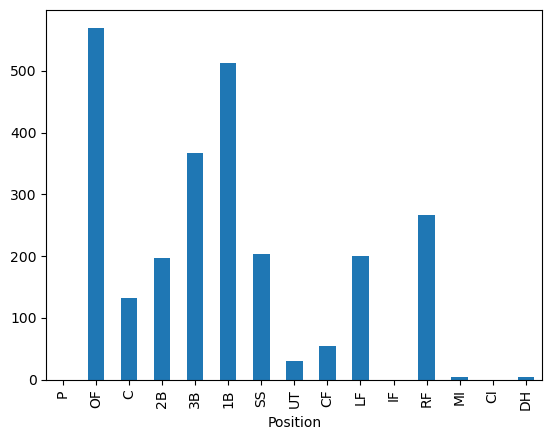

In [72]:
avg_runs_exceptional_sorted_filled.plot(kind='bar')

<Axes: xlabel='Position'>

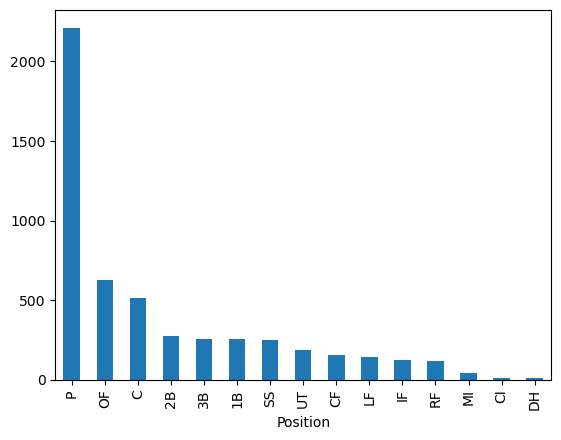

In [73]:
position_total.plot(kind='bar')

In [ ]:
# Are there players that keep performing exceptionally year after year?

## Does a pitcher's overall performance impact game losses and wins?

In [27]:
# Does a player's dominant hand have an impact on the player's performance?


# All right-handed players:
pitching_data_right = pitching_data.loc[pitching_data["Dominant_Hand"] ==  "Right"]
pitching_data_right.head()

# All left-handed players:
pitching_data_left = pitching_data.loc[pitching_data["Dominant_Hand"] ==  "Left"]
pitching_data_left.head()



,Rank,Year,Position,Name,Age,Wins,Losses,Winning_Percentage,Earned_Run_Average,Games_Played,...,Adjusted_Earned_Run_Average,Fielding_Independent_Pitching,Walks_Hits_Per_Inning_Pitched,Hits_Per_Nine_Innings,Home_Runs_Per_Nine_Innings,Walks_Per_Nine_Innings,Strikeouts_Per_Nine_Innings,Strikeout_Walk_Ratio,Dominant_Hand,Switch_Hitter
0,1,2023,SP,Justin Steele,27,16,5,0.762,3.06,30,...,146,3.02,1.171,8.7,0.7,1.9,9.1,4.89,Left,No
2,3,2023,SP,Drew Smyly,34,11,11,0.500,5.00,41,...,90,4.96,1.426,9.3,1.6,3.5,8.9,2.52,Left,No
12,13,2023,NaN,Jordan Wicks,23,4,1,0.800,4.41,7,...,102,4.70,1.269,8.6,1.3,2.9,6.2,2.18,Left,No
17,18,2023,NaN,Brandon Hughes,27,0,3,0.000,7.24,17,...,63,4.65,1.610,9.2,1.3,5.3,11.2,2.13,Left,No
18,19,2023,NaN,Anthony Kay,28,0,0,0.000,6.35,13,...,73,5.37,1.765,9.5,0.8,6.4,6.4,1.00,Left,No


In [28]:
# Look at Strikeouts_Per_Nine_Innings

strikeouts_right_mean = pitching_data_right["Strikeouts_Per_Nine_Innings"].mean()
strikeouts_right_median = pitching_data_right["Strikeouts_Per_Nine_Innings"].median()
strikeouts_right_std = pitching_data_right["Strikeouts_Per_Nine_Innings"].std()

In [29]:
strikeouts_left_mean = pitching_data_left["Strikeouts_Per_Nine_Innings"].mean()
strikeouts_left_median = pitching_data_left["Strikeouts_Per_Nine_Innings"].median()
strikeouts_left_std = pitching_data_left["Strikeouts_Per_Nine_Innings"].std()

In [30]:
strikeouts_byhand_summary_r = {
                    'Average': strikeouts_right_mean,            
                    'Median': strikeouts_right_median,      
                    'Std. Dev.': strikeouts_right_std      
                    }

strikeouts_byhand_summary_rt = pd.DataFrame(strikeouts_byhand_summary_r, index=['Right-handed'])
strikeouts_byhand_summary_rt

,Average,Median,Std. Dev.
Right-handed,5.232828,4.7,2.987241


In [31]:
strikeouts_byhand_summary_l = {
                    'Average': strikeouts_left_mean,            
                    'Median': strikeouts_left_median,      
                    'Std. Dev.': strikeouts_left_std      
                    }

strikeouts_byhand_summary_lt = pd.DataFrame(strikeouts_byhand_summary_l, index=['Left-handed'])
strikeouts_byhand_summary_lt

,Average,Median,Std. Dev.
Left-handed,5.738079,5.3,3.324458


In [32]:
# stikeouts_byhand_summary = pd.concat([strikeouts_byhand_summary_rt,strikeouts_byhand_summary_lt], ignore_index=False)


In [33]:
# strikeouts_byhand_summary

<Axes: ylabel='Dominant Hand'>

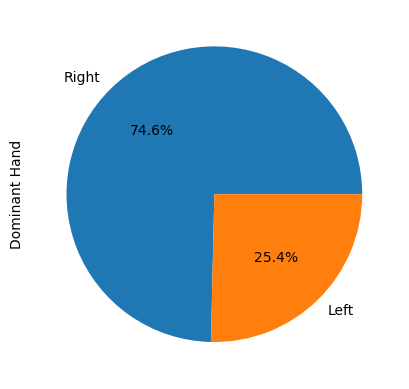

In [34]:
# Pie chart of right vs left-handed
dominant_hand_comparison = pitching_data["Dominant_Hand"].value_counts()
dominant_hand_comparison.plot(
                        kind='pie',
                        ylabel='Dominant Hand',
                        autopct="%1.1f%%")